In [1]:
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import math

In [2]:
rawList = []
length = 0
delta0List = []
delta1List = []
delta2List = []
logEkList = []

def smooth(y):
    # return y
    return savgol_filter(y, 101, 3, mode= 'nearest')

with open("./deltaData.save") as file:
    rawList = eval(file.readline())
    length = len(rawList)
    for i in rawList:
        delta0List.append(i[0])
        delta1List.append(i[1])
        delta2List.append(i[2])
        if(i[3] <= 0):
            i[3] = 1
        logEkList.append(math.log(i[3]))

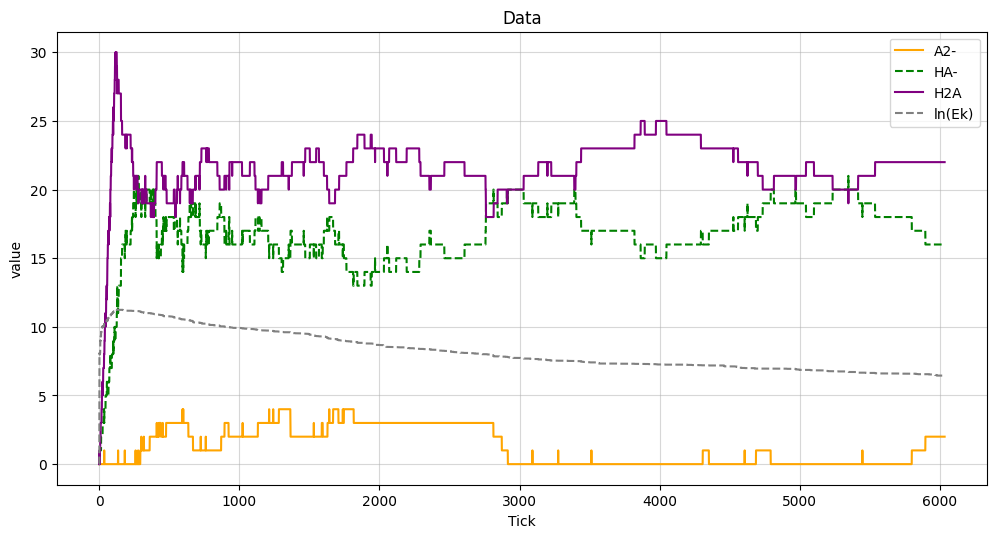

In [4]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.title("Data")
plt.xlabel('Tick')
plt.ylabel('value')


plt.plot(range(length), smooth(delta0List), color='orange', label='A2-')
plt.plot(range(length), smooth(delta1List), color='green', label='HA-')
plt.plot(range(length), smooth(delta2List), color='purple', label='H2A')
plt.plot(range(length), smooth(logEkList), color='grey', label='ln(Ek)', linestyle='--')


plt.grid(alpha=0.5)
plt.legend(loc='upper right')